# YouTube Channel Analytics (Mr. Beast) &amp; Statistics

### Installing library

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     |████████████████████████████████| 7.9 MB 12.2 MB/s 
     |████████████████████████████████| 96 kB 4.4 MB/s 
     |████████████████████████████████| 146 kB 45.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Imports

In [ ]:
from googleapiclient.discovery import build
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### API Setup

In [ ]:
API_KEY = os.environ["API_KEY"]
channel_id = "UCX6OQ3DkcsbYNE6H8uQQuVA"
youtube = build('youtube','v3',developerKey=API_KEY)

### API Functions

In [ ]:
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id = channel_id 
    )
    response = request.execute()

    return response['items']

In [ ]:
def get_video_list(youtube, upload_id):
    video_list = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=upload_id,
        maxResults=50
    )
    next_page = True

    while next_page:
        response = request.execute()
        data = response['items']

        for video in data:
            video_id = video['contentDetails']['videoId']
            if video_id not in video_list:
                video_list.append(video_id)

        if 'nextPageToken' in response.keys():
            next_page = True
            request = youtube.playlistItems().list(
                part="snippet,contentDetails",
                playlistId=upload_id,
                maxResults=50,
                pageToken=response['nextPageToken']
            )
        else:
            next_page = False

    return video_list



In [ ]:
def get_video_details(youtube, video_list):
    stats_list=[]

    # Can only get 50 videos at a time.
    for i in range(0, len(video_list), 50):
        request= youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_list[i:i+50]
        )

        data = request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            description=video['snippet']['description']
            tag_count= len(video['snippet'].get('tags',[]))
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            dislike_count=video['statistics'].get('dislikeCount',0)
            comment_count=video['statistics'].get('commentCount',0)

            stats_dict=dict(
                title=title, 
                description=description, 
                published=published, 
                tag_count=tag_count, 
                view_count=view_count, 
                like_count=like_count, 
                dislike_count=dislike_count, 
                comment_count=comment_count
            )
           
            stats_list.append(stats_dict)

    return stats_list

### Create channel stats

In [ ]:
channel_stats = get_channel_stats(youtube, channel_id)

### Find upload playlist ( it contains list of all videos uploaded )

In [ ]:
playlist_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
playlist_id

'UUX6OQ3DkcsbYNE6H8uQQuVA'

### Get Video List

In [ ]:
video_list = get_video_list(youtube, playlist_id)

In [ ]:
len(video_list)

716

### Get Video details

In [ ]:
video_data = get_video_details(youtube, video_list)

In [ ]:
video_data[0]

{'title': 'I Got Hunted By The Military',
 'description': 'I\'m not sure how they drove over that... it wasnt supposed to happen\nSign up using code "BEASTHUNT" with current! https://current.com/beasthunt\n\n\nNew Merch - https://shopmrbeast.com/\n\nSUBSCRIBE OR I TAKE YOUR DOG\n╔═╦╗╔╦╗╔═╦═╦╦╦╦╗╔═╗\n║╚╣║║║╚╣╚╣╔╣╔╣║╚╣═╣ \n╠╗║╚╝║║╠╗║╚╣║║║║║═╣\n╚═╩══╩═╩═╩═╩╝╚╩═╩═╝\n\nCongrats to all the winners from the last video!\n~babystar22\n~KevinAllen30\n~MasonCunningham2020\n~CheyniaWilson\n~Dannyboiiii08\n~Andresiux23\n~AmandaLawrence6\n~DonshaeHannah\n~KirstenTeafatiller\n~UndeadWiccan\n~BenjaminPaz\n~TylerSmith98\n~JoseRangel11\n~StorieDaise\n~AlexiaClark1462\n~MattyRivers\n~onlymarkis\n~ThomasWebster00\n~NoahTribbleking\n~JHix87252\n~AntSmith1996\n~AnthonyNino3\n~JordanMetz\n~xonviejade\n~CMcCabe23\n~Vonnny\n~ROITDABBY\n~PaulMeehan430\n~MaximusButenko\n~MaximusButenko\n~ZacharyArmstead\n~HunterLeitch\n~ThornTheriot\n~AliMakki\n~Quann99\n~Trawjr\n~JohnNovits\n~MCCARVES\n~KazzVaz\n~JenniJones400\

In [ ]:
channel_stats[0]['statistics']

{'viewCount': '13929031625',
 'subscriberCount': '84900000',
 'hiddenSubscriberCount': False,
 'videoCount': '716'}

### Visualizations

In [ ]:
df=pd.DataFrame(video_data)

df['title_length'] = df['title'].str.len()
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["dislike_count"] = pd.to_numeric(df["dislike_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
# reaction used later add up likes + dislikes + comments
df["reactions"] = df["like_count"] + df["dislike_count"] + df["comment_count"] + df["comment_count"]
df.to_csv("MrBeast-Data.csv")
df.head(10)

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions
0,I Got Hunted By The Military,I'm not sure how they drove over that... it wa...,2021-12-10T21:30:02Z,0,37451638,2259710,0,87868,28,2435446
1,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,2021-11-24T21:00:01Z,0,169479533,11967970,0,565682,33,13099334
2,I Cleaned The World’s Dirtiest Beach #TeamSeas,$1 Donated = 1 Pound Of Trash Out Of The Ocean...,2021-10-29T19:59:43Z,0,51800966,4106358,0,177236,46,4460830
3,"Last To Take Hand Off Lamborghini, Keeps It",Subscribe if you want to compete!\nWatch My Do...,2021-10-23T20:00:01Z,0,51412216,2607250,0,115992,43,2839234
4,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26T20:00:06Z,0,48602623,2331918,0,120266,31,2572450
5,"Extreme $500,000 Game Of Tag!",I did not expect that to happen at the end...\...,2021-09-04T20:00:07Z,0,56505400,2751231,0,99382,29,2949995
6,"Last To Leave Circle Wins $500,000",THIS WAS THE CRAZIEST THING IVE EVER DONE!\nGe...,2021-08-31T20:01:03Z,0,92368613,3433729,0,94117,34,3621963
7,I Got Hunted By The FBI,You guys loved the bounty hunter video so we d...,2021-08-07T23:00:03Z,0,70978783,2539948,0,88883,23,2717714
8,"If You Can Carry $1,000,000 You Keep It!",Exclusive Merch Here - https://shopmrbeast.com...,2021-07-24T20:00:59Z,0,58110161,1980422,0,67710,40,2115842
9,"Would YOU Quit School For $100,000?",You won’t believe what they chose!\nNew Merch ...,2021-07-10T20:00:09Z,0,54550760,1991612,0,78710,35,2149032


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Number of Tags Used'), Text(0, 0.5, 'Occurrences')]

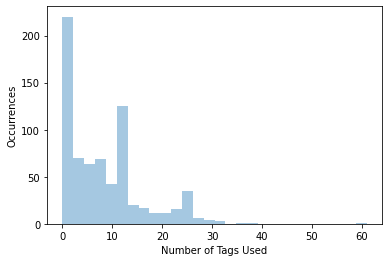

In [ ]:
# Histogram of tag count.
chart = sns.distplot( a=df["tag_count"], hist=True, kde=False, rug=False )
chart.set(xlabel='Number of Tags Used', ylabel='Occurrences')

[Text(0.5, 0, 'Title Length'), Text(0, 0.5, 'Occurrences')]

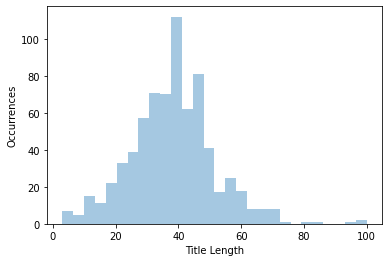

In [ ]:
chart = sns.distplot( a=df["title_length"], hist=True, kde=False, rug=False )
chart.set(xlabel='Title Length', ylabel='Occurrences')

In [ ]:
df_highest_views = df.nlargest(10, 'view_count')
df_highest_views['title'] = df_highest_views['title'].str[:40]
df_highest_views['view_count_millions'] = df_highest_views['view_count'] / 1000000
df_highest_views

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions,view_count_millions
1,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,2021-11-24T21:00:01Z,0,169479533,11967970,0,565682,33,13099334,169.479533
48,I Spent 50 Hours In Solitary Confinement,i borderline went crazy about 30 hours in...\n...,2020-05-30T20:10:08Z,0,157356279,3092167,0,105889,40,3303945,157.356279
17,I Spent 50 Hours Buried Alive,This was the most insane thing I’ve ever done\...,2021-03-27T20:00:04Z,0,153117349,5354269,0,233269,29,5820807,153.117349
143,I Put 100 Million Orbeez In My Friend's,THIS WAS THE CRAZIEST THING WE HAVE EVER DONE ...,2018-11-22T21:08:01Z,0,150718046,3953907,0,136295,48,4226497,150.718046
28,"Press This Button To Win $100,000!",Push the red subscribe button and you could al...,2020-11-14T21:00:02Z,0,143850164,2739765,0,83473,34,2906711,143.850164
57,Anything You Can Fit In The Circle I’ll,Watch until the end to see how much i spent\nN...,2020-03-07T21:00:00Z,0,143843986,3708169,0,108555,47,3925279,143.843986
82,"Going Through The Same Drive Thru 1,000",I can't believe we did this lol\n\nNew Merch -...,2019-10-05T20:00:08Z,0,137915561,3214323,0,124502,45,3463327,137.915561
58,"I Ate A $70,000 Golden Pizza",I cant believe we actually did this...\nPlease...,2020-02-29T21:00:22Z,0,126315096,2832228,0,104237,28,3040702,126.315096
124,I Went Back To 1st Grade For A Day,me and the squad went back to first grade for ...,2019-01-31T22:05:00Z,0,118762603,2294154,0,134770,34,2563694,118.762603
39,"Last To Leave $800,000 Island Keeps It",I can't believe I gave away a private island. ...,2020-08-15T20:00:02Z,0,118685688,3704624,0,225751,38,4156126,118.685688


Text(0.5, 1.0, 'Most Viewed Videos')

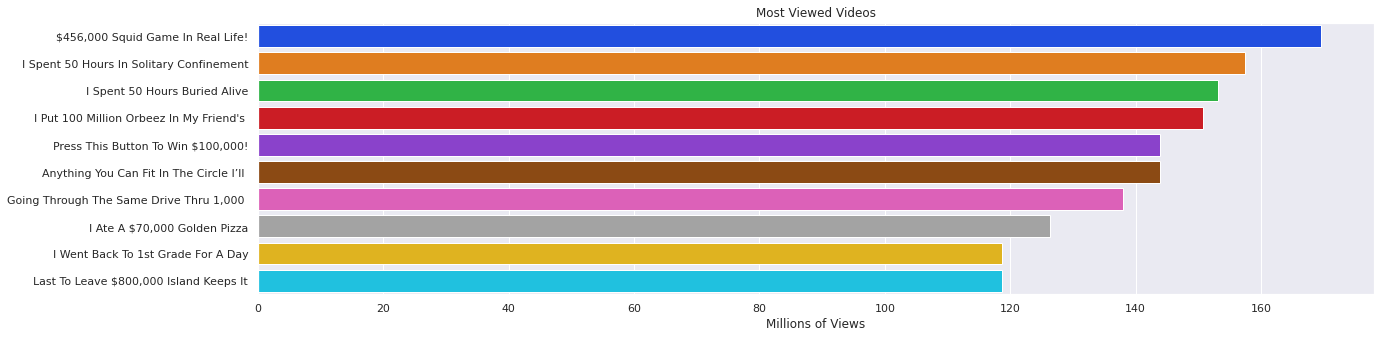

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(x="view_count_millions", y="title", data=df_highest_views, palette="bright")
plot.set(xlabel='Millions of Views', ylabel='')
plot.set_title('Most Viewed Videos')

In [ ]:
# Most Interations ( Like + Dislikes + Comments)
df_highest_reactions = df.nlargest(10, 'reactions')
df_highest_reactions['title'] = df_highest_reactions['title'].str[:40]
df_highest_reactions['reactions'] = df_highest_reactions['reactions'] / 1000
df_highest_reactions

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions
127,Make This Video The Most Liked Video On,"WHAT IS UP LOGANG, MAKE SURE YOU LIKE THE VIDE...",2019-01-16T22:05:01Z,0,96370107,19019769,0,277081,47,19573.931
1,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,2021-11-24T21:00:01Z,0,169479533,11967970,0,565682,33,13099.334
17,I Spent 50 Hours Buried Alive,This was the most insane thing I’ve ever done\...,2021-03-27T20:00:04Z,0,153117349,5354269,0,233269,29,5820.807
23,"Youtube Rewind 2020, Thank God It's Over",This is what Youtube Rewind would look like if...,2021-01-01T21:00:03Z,0,56949404,4701284,0,297576,40,5296.436
49,If You Click This Video I'll Give My Fri,Make sure you watch this video a bunch!\nNew M...,2020-05-23T21:01:02Z,0,115863999,4912170,0,151398,49,5214.966
25,I Opened A Restaurant That Pays You To E,Download our MrBeast Burger App and order food...,2020-12-19T22:00:03Z,0,93201366,3510681,0,726619,48,4963.919
26,"I Gave People $1,000,000 But ONLY 1 Minu",Subscribe right now and you might be picked to...,2020-12-15T21:00:11Z,0,91143938,4269267,0,170627,55,4610.521
2,I Cleaned The World’s Dirtiest Beach #Te,$1 Donated = 1 Pound Of Trash Out Of The Ocean...,2021-10-29T19:59:43Z,0,51800966,4106358,0,177236,46,4460.830
33,Hi Me In 5 Years,This video was filmed 5 years ago \nYou better...,2020-10-04T20:00:54Z,0,54294688,4015633,0,202990,16,4421.613
143,I Put 100 Million Orbeez In My Friend's,THIS WAS THE CRAZIEST THING WE HAVE EVER DONE ...,2018-11-22T21:08:01Z,0,150718046,3953907,0,136295,48,4226.497


Text(0.5, 1.0, 'Most Video Reactions')

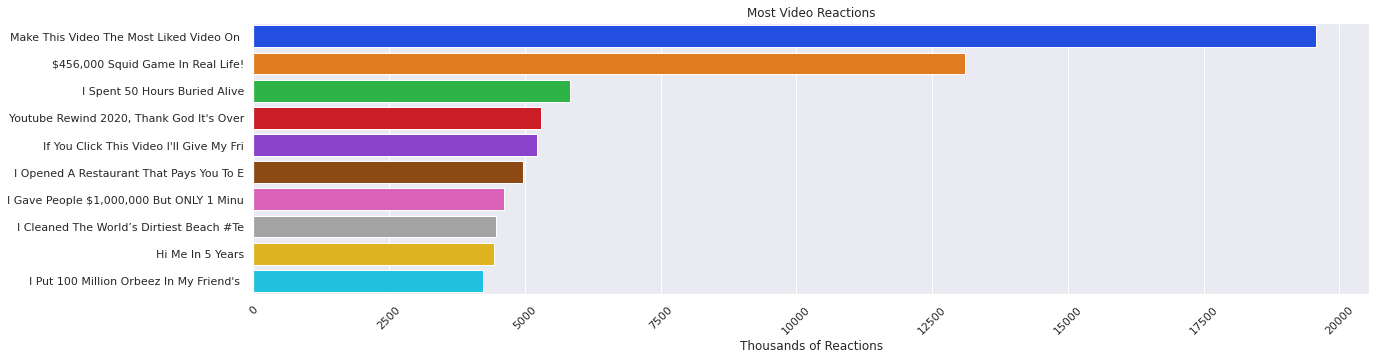

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="title", x="reactions", data=df_highest_reactions, palette="bright")
plot.set(xlabel='Thousands of Reactions', ylabel='')
plt.xticks(rotation=45)
plot.set_title('Most Video Reactions')

In [ ]:
df_highest_disliked = df.nlargest(10, 'dislike_count')
df_highest_disliked['title'] = df_highest_disliked['title'].str[:40]
df_highest_disliked['dislike_count'] = df_highest_disliked['dislike_count'] / 1000
df_highest_disliked

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions
0,I Got Hunted By The Military,I'm not sure how they drove over that... it wa...,2021-12-10T21:30:02Z,0,37451638,2259710,0.0,87868,28,2435446
1,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,2021-11-24T21:00:01Z,0,169479533,11967970,0.0,565682,33,13099334
2,I Cleaned The World’s Dirtiest Beach #Te,$1 Donated = 1 Pound Of Trash Out Of The Ocean...,2021-10-29T19:59:43Z,0,51800966,4106358,0.0,177236,46,4460830
3,"Last To Take Hand Off Lamborghini, Keeps",Subscribe if you want to compete!\nWatch My Do...,2021-10-23T20:00:01Z,0,51412216,2607250,0.0,115992,43,2839234
4,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26T20:00:06Z,0,48602623,2331918,0.0,120266,31,2572450
5,"Extreme $500,000 Game Of Tag!",I did not expect that to happen at the end...\...,2021-09-04T20:00:07Z,0,56505400,2751231,0.0,99382,29,2949995
6,"Last To Leave Circle Wins $500,000",THIS WAS THE CRAZIEST THING IVE EVER DONE!\nGe...,2021-08-31T20:01:03Z,0,92368613,3433729,0.0,94117,34,3621963
7,I Got Hunted By The FBI,You guys loved the bounty hunter video so we d...,2021-08-07T23:00:03Z,0,70978783,2539948,0.0,88883,23,2717714
8,"If You Can Carry $1,000,000 You Keep It!",Exclusive Merch Here - https://shopmrbeast.com...,2021-07-24T20:00:59Z,0,58110161,1980422,0.0,67710,40,2115842
9,"Would YOU Quit School For $100,000?",You won’t believe what they chose!\nNew Merch ...,2021-07-10T20:00:09Z,0,54550760,1991612,0.0,78710,35,2149032


(10.0, 55.0)

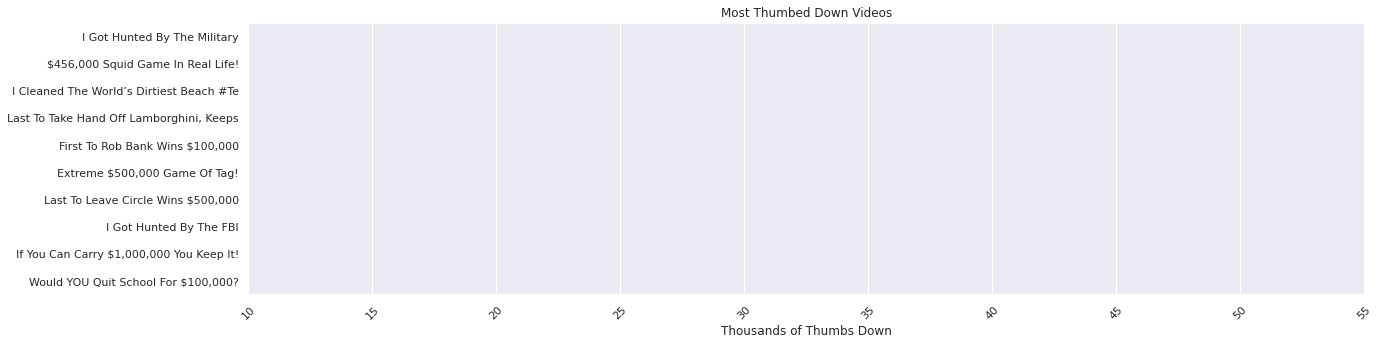

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="title", x="dislike_count", data=df_highest_disliked, palette="bright")
plot.set(xlabel='Thousands of Thumbs Down', ylabel='')
plt.xticks(rotation=45)
plot.set_title('Most Thumbed Down Videos')
plt.xlim(10, 55)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b3649ae3-bbe0-4ba6-a095-6de0978072f0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>